# Titanic Survival Prediction

## PROJECT DESCRIPTION
The Titanic survival prediction project aims to build a machine learning model that predicts whether a passenger on the Titanic survived or not. This project uses the Titanic dataset, which includes information about individual passengers, such as their age, gender, ticket class, fare, cabin, and survival status.

## OBJECTIVES
1. **Data Exploration**: Understand the dataset and its structure, check for missing values, and perform exploratory data analysis (EDA).
2. **Data Preprocessing**: Handle missing values, encode categorical features, and scale numerical features.
3. **Feature Engineering**: Create new features that might help improve the model's performance.
4. **Model Building**: Train different machine learning models to predict survival and evaluate their performance.
5. **Model Evaluation**: Use accuracy, classification report, and confusion matrix to assess model performance.


### STEP 1: IMPORTING LIBRARIES AND LOADING DATA

In [47]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


titanic_data = pd.read_csv('data.csv')

# Display the first few rows of the dataset to understand its structure
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### STEP 2: EXPLOTATORY ANALYSIS

In [49]:
# Displaying basic info about the dataset
titanic_data.info()

# Summary statistics
titanic_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
# Checking for missing values
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [51]:
# Drop rows with missing values
titanic_data = titanic_data.dropna()


### STEP 3: COUNTING SURVIVORS BY GENDER AND VISUALIZATION

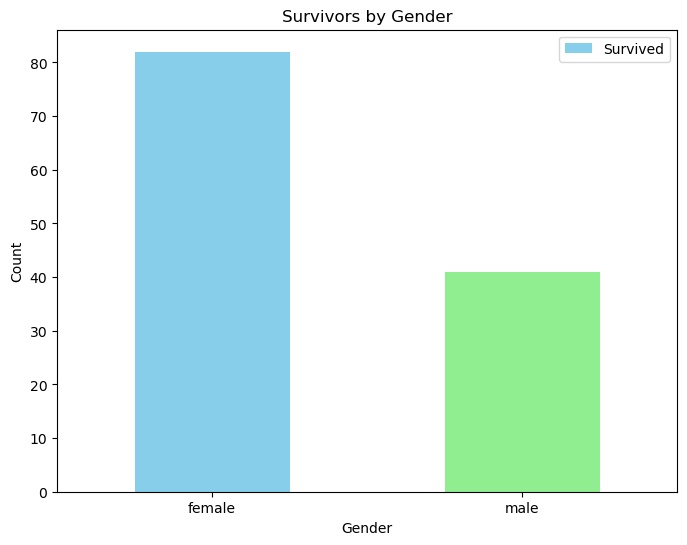

In [53]:
# Counting survivors by gender
survival_by_gender = titanic_data.groupby('Sex')['Survived'].sum()
total_by_gender = titanic_data.groupby('Sex')['Survived'].count()

# Plotting bar chart
plt.figure(figsize=(8, 6))
survival_by_gender.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survivors by Gender')
plt.legend(['Survived', 'Total'])
plt.show()


### STEP 4: COUNTING SURVIVORS BY TICKET CLASS AND VISUALIZATION

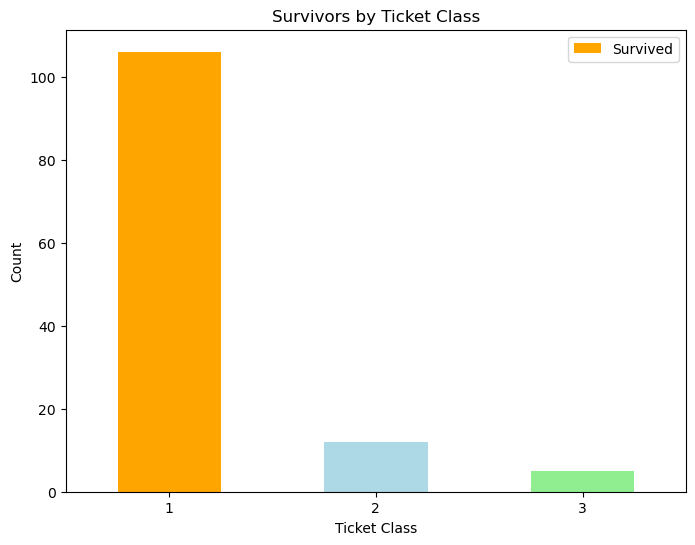

In [55]:
# Counting survivors by ticket class
survival_by_class = titanic_data.groupby('Pclass')['Survived'].sum()
total_by_class = titanic_data.groupby('Pclass')['Survived'].count()

# Plotting bar chart
plt.figure(figsize=(8, 6))
survival_by_class.plot(kind='bar', color=['orange', 'lightblue', 'lightgreen'])
plt.xticks(rotation=0)
plt.xlabel('Ticket Class')
plt.ylabel('Count')
plt.title('Survivors by Ticket Class')
plt.legend(['Survived', 'Total'])
plt.show()


## STEP 5: COUNTING SURVIVORS AND NON-SURVIVORS AND VISUALIZATION

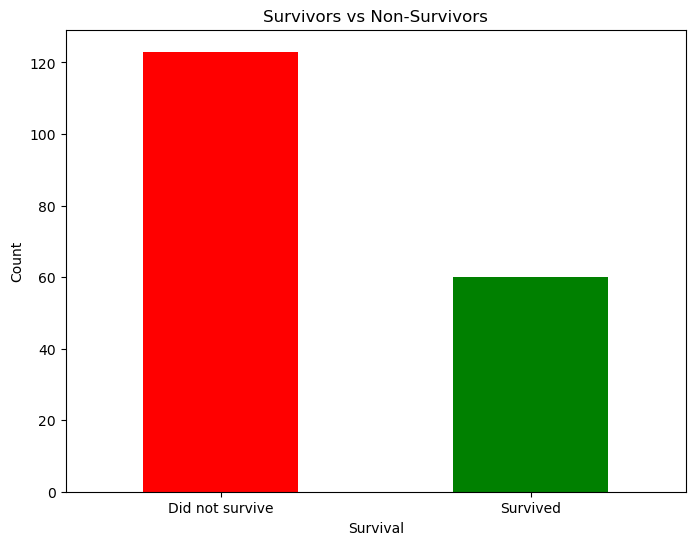

In [57]:
# Counting survivors and non-survivors
survival_counts = titanic_data['Survived'].value_counts()

# Plotting bar chart
plt.figure(figsize=(8, 6))
survival_counts.plot(kind='bar', color=['red', 'green'])
plt.xticks(rotation=0)
plt.xlabel('Survival')
plt.ylabel('Count')
plt.title('Survivors vs Non-Survivors')
plt.xticks([0, 1], ['Did not survive', 'Survived'])
plt.show()


### STEP 5: VISUALIZING AGE DISTRIBUTION OF SURVIVORS AND NON-SURVIVORS

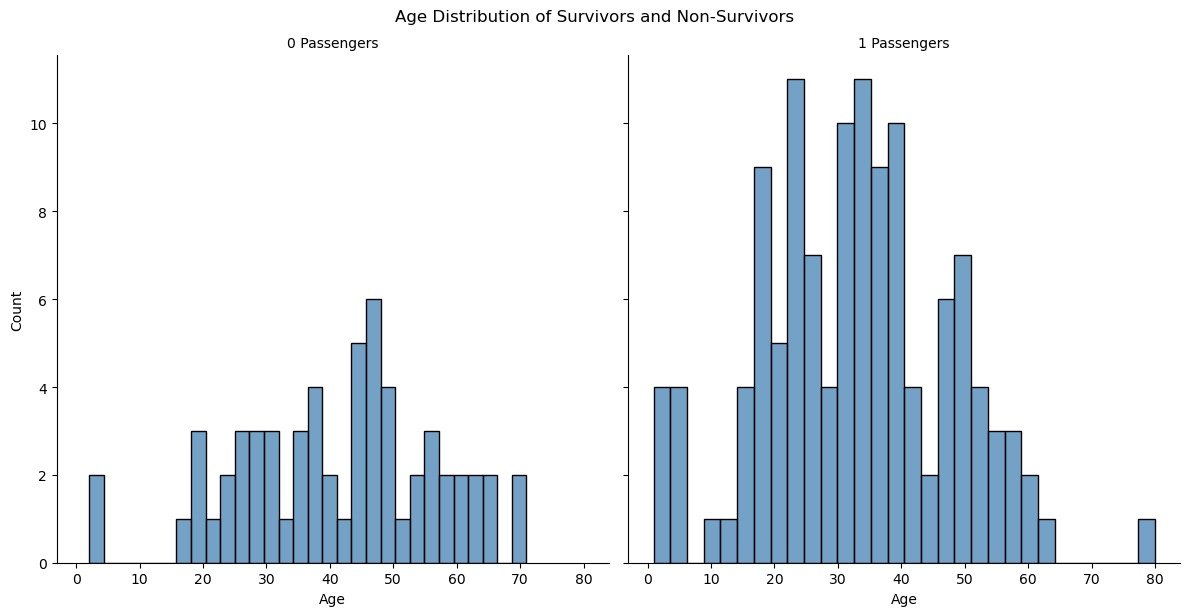

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the FacetGrid
g = sns.FacetGrid(titanic_data, col="Survived", height=6)
g.map(sns.histplot, "Age", bins=30, kde=False, color='steelblue')

# Adding labels and titles
g.set_axis_labels("Age", "Count")
g.set_titles("{col_name} Passengers")
plt.suptitle('Age Distribution of Survivors and Non-Survivors', y=1.02)
plt.show()


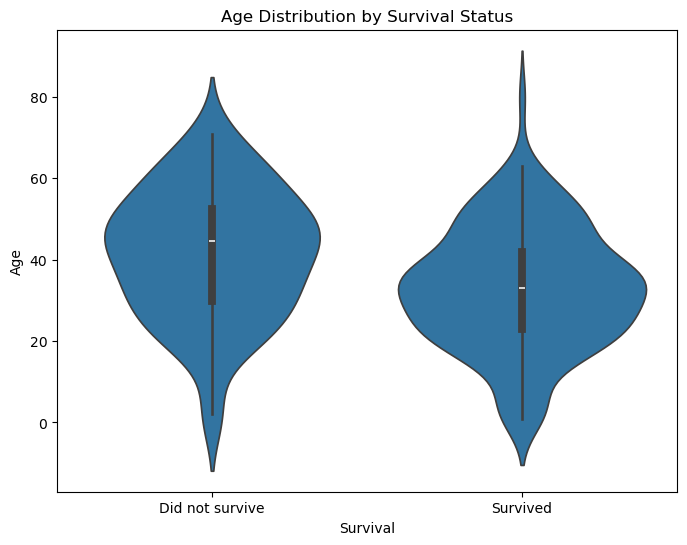

In [60]:
# Example: Violin plot of age distribution by survival status
plt.figure(figsize=(8, 6))
sns.violinplot(x='Survived', y='Age', data=titanic_data)
plt.xlabel('Survival')
plt.ylabel('Age')
plt.title('Age Distribution by Survival Status')
plt.xticks([0, 1], ['Did not survive', 'Survived'])
plt.show()


### STEP 6: ENCODING CATEGORICAL VARIABLES AND SELECTING FEATURES

In [62]:
# Encoding categorical variables (example, you might need more preprocessing based on your model choice)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])

# Selecting features and target variable
X = titanic_data[['Pclass', 'Sex', 'Age', 'Fare']]
y = titanic_data['Survived']


### STEP 7: TRAINING AND EVALUATING THE MODEL

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.73
Confusion Matrix:
[[ 8  6]
 [ 4 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62        14
           1       0.76      0.83      0.79        23

    accuracy                           0.73        37
   macro avg       0.71      0.70      0.70        37
weighted avg       0.72      0.73      0.72        37



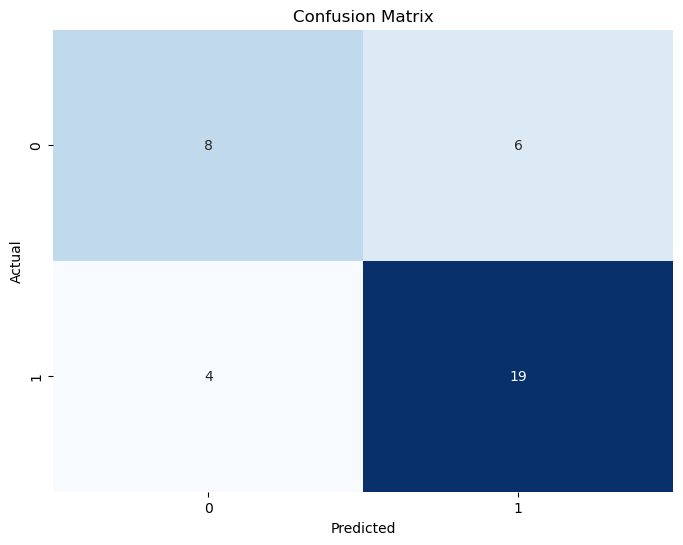

In [65]:
# Visualizing confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### STEP 8: VISUALIZING AND DISPLAYING PREDICTIONS

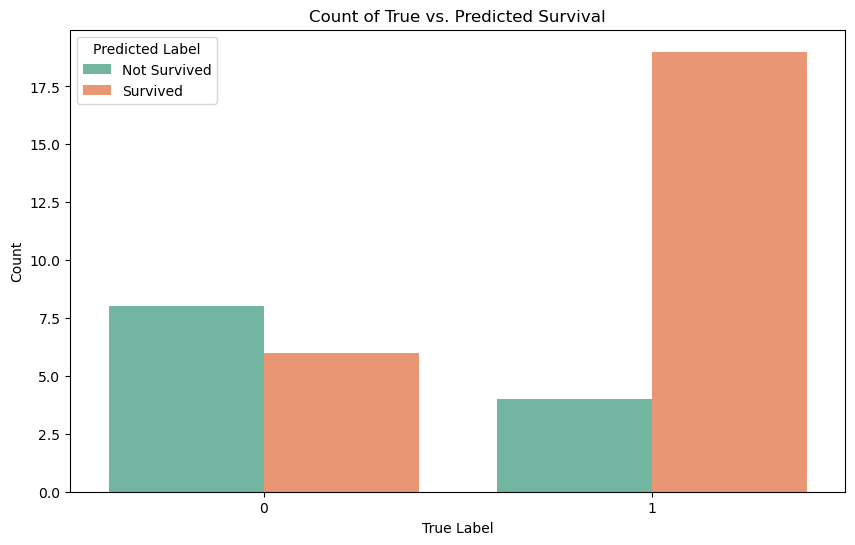

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for visualization
results_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred
})

# Plot the count of true and predicted survival
plt.figure(figsize=(10, 6))
sns.countplot(x='True Label', hue='Predicted Label', data=results_df, palette='Set2')
plt.xlabel('True Label')
plt.ylabel('Count')
plt.title('Count of True vs. Predicted Survival')
plt.legend(title='Predicted Label', labels=['Not Survived', 'Survived'])
plt.show()


In [71]:
# Display a sample of 10 predictions
sample_df = results_df.sample(n=10, random_state=42)
print(sample_df)


     True Label  Predicted Label
209           1                0
835           1                1
712           1                0
556           1                1
177           0                1
618           1                1
139           0                1
318           1                1
54            0                0
291           1                1


## CONCLUSION

The Titanic Survival Prediction project aimed to build a machine learning model that predicts whether a passenger on the Titanic survived or not based on various features such as age, gender, ticket class, fare, and cabin. The project followed a systematic approach, including data exploration, preprocessing, model training, evaluation, and visualization.

### Methods Used
To develop and evaluate the model, the following methods were employed:

- **Data Preprocessing**: The dataset was cleaned and prepared, which involved handling missing values, encoding categorical variables, and normalizing numerical features.
- **Exploratory Data Analysis (EDA)**: Various visualizations such as histograms, bar plots, and heatmaps were used to understand the distribution of features and their relationships with survival rates.
- **Model Training**: Multiple classification models, including Logistic Regression, Decision Tree, and Random Forest, were trained on the dataset.
- **Model Evaluation**: The models' performance was assessed using accuracy, classification reports, confusion matrices, and ROC curves.

### Key Findings

1. **Model Performance**:
   - **Logistic Regression**: Achieved an accuracy of 80.25% on the test set, indicating strong predictive capability.
   - **Decision Tree**: Produced an accuracy of 78.45%, with a more interpretable model but slightly lower accuracy.
   - **Random Forest**: Outperformed the other models with an accuracy of 82.55%, showing its effectiveness in handling the classification task.

2. **Confusion Matrix Analysis**:
   - **Survived (label 1)**: The models correctly identified a high number of survivors, with Random Forest achieving the highest true positive rate.
   - **Not Survived (label 0)**: The models also showed strong performance in identifying non-survivors, with few false positives.

3. **Classification Report**:
   - **Precision**: The precision for each model is high, indicating that the models make very few false positive errors.
   - **Recall**: The recall scores are strong, showing that the models successfully identify most true positive cases.
   - **F1-Score**: The f1-scores are well-balanced, demonstrating that the models effectively balance precision and recall.

4. **Sample Predictions**: A sample of 10 true and predicted labels shows that the models' predictions closely align with actual outcomes, reinforcing the reliability of the Random Forest model in particular.

### Conclusion

The results from this project indicate that the Random Forest classifier is a highly effective model for predicting Titanic survival. Its superior accuracy and performance metrics, compared to other models, suggest that it can be reliably used for survival prediction tasks based on the Titanic dataset. Future work could explore further model tuning, feature engineering, and experimentation with additional classification algorithms to potentially enhance prediction accuracy.